# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd # импорт библиотеки pandas
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t') # чтение файла с данными и сохранение в df

In [3]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице 22 столбца.
Обнаружены пропуски данных и неверный формат данных в некоторых столбца.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

In [4]:
df.head(10) # получение первых 10 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Просмотрим уникальные значения и их кол-во в интересующих нас столбцах:**

In [5]:
df['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64

* Неверных значений не обнаружено

In [6]:
df.query('last_price <= 10000')['last_price'].count()

0

* Неверных значений не обнаружено

In [7]:
df.query('total_area <= 10 or total_area >= 1000')['total_area'].count()

0

* Неверных значений не обнаружено

In [8]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

* Неверных значений не обнаружено

In [9]:
df.query('ceiling_height < 2 or ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,NaN,...,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.00,5.0,15.3,2,False,...,7.30,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.00,9.0,30.0,2,NaN,...,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.00,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.00,5.0,19.5,1,True,...,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.00,5.0,30.0,3,NaN,...,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.00,9.0,21.3,3,NaN,...,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.0,13,NaN,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


Обнаруженно 32 подозрительных значения:
* в значениях, где высота потолков указана от 20 до 40 метров, скорее всего не верно поставлена запятая, значение необходимо разделить на 10
* в остальных подозрительных значения, возможны различные ошибки (поставлена не та цифра, указана не высота потолков, а другая величина), данные значения можно заменить на 0
* Пустые строки так же заменим на 0

In [10]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

Значения корректные, но обнаружены пропуски данных, заменим их на 0, возможно в исследование нам понадобится информация, что кол-во этажей пропущено. Так же необходимо изменить тип данных на int, так как кол-во этажей не может быть ни целым.

In [11]:
df.query('living_area < 0 or living_area >= 1000')['living_area'].count()

0

* Неверных значений не обнаружено, но есть пропуски данных, заменим их на нули.

In [12]:
df['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64

* Неверных значений не обнаружено

In [13]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

* Неверных значений не обнаружено, но есть много пропущенных значений, по-видимому данные помещения не являются апартаментами, поэтому заменим пропуски на значение - False. Тип данных необходимо заменить на bool.

In [14]:
df['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

* Неверных значений не обнаружено

In [15]:
df['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

* Неверных значений не обнаружено

In [16]:
df.query('kitchen_area  < 1 or kitchen_area   >= 150')['kitchen_area'].count()

0

* Неверных значений не обнаружено, но есть пропуски данных, заменим их на 0.

In [17]:
df.query('last_price < 10000 or last_price > 1000000000')['last_price'].count()

0

* Неверных значений не обнаружено

In [18]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Значения корректные, но обнаружены пропуски данных, можно их заменить на 0, так как кол-во балконов скорее всего не указанно из-за их отсутствия. Так же необходимо изменить тип данных на int, так как кол-во балконов не может быть ни целым.

In [19]:
df['locality_name'].value_counts()

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Чудской Бор               1
деревня Хязельки                  1
поселок Севастьяново              1
деревня Малая Романовка           1
посёлок Форт Красная Горка        1
Name: locality_name, Length: 364, dtype: int64

Значения корректные, но обнаружены пропуски данных, удалим их, так как мы не можем быть уверены, что эти квартиры принадлежат Ленинградской области.

In [20]:
df.query('airports_nearest < 0 or airports_nearest>= 100000')['airports_nearest'].count() 

0

Значения корректные, но обнаружены пропуски данных, оставим их без изменений, возможно они нам пригодятся в исследование

In [21]:
df.query('cityCenters_nearest < 0 or cityCenters_nearest>= 100000')['cityCenters_nearest'].count() 

0

Значения корректные, но обнаружены пропуски данных, оставим их без изменений, возможно они нам пригодятся в исследование

In [22]:
df['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Значения корректные, но обнаружены пропуски данных, можно их заменить на 0, так как кол-во парков скорее всего не указанно из-за их отсутствия. Так же необходимо изменить тип данных на int, так как кол-во парков не может быть ни целым.

In [23]:
df.query('parks_nearest < 0 or parks_nearest >= 10000')['parks_nearest'].count() 

0

Значения корректные, но обнаружены пропуски данных, оставим их без изменений, возможно они нам пригодятся в исследование

In [24]:
df['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Значения корректные, но обнаружены пропуски данных, можно их заменить на 0, так как кол-во водоемов скорее всего не указанно из-за их отсутствия. Так же необходимо изменить тип данных на int, так как кол-во водоемов не может быть ни целым.

In [25]:
df.query('ponds_nearest < 0 or ponds_nearest >= 10000')['ponds_nearest'].count() 

0

Значения корректные, но обнаружены пропуски данных, оставим их без изменений, возможно они нам пригодятся в исследование

In [26]:
df.query('days_exposition <= 0 or days_exposition >= 2000')['days_exposition'].count()

0

Значения корректные, но обнаружены пропуски данных, заменим их на 0. Так же необходимо изменить тип данных на int.

### Вывод

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски и ошибки в данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Удаляем пропуски в столбце 'locality_name'

In [27]:
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

Исправляем некорректные значения в столбце `ceiling_height`

In [28]:
# Заменяем некорректные значения на 0
df.loc[(df['ceiling_height'] >= 40) & (df['ceiling_height'] < 2), 'ceiling_height'] = 0
# Делим на 10 значения, которые находятся в диапазоне от 20 до 40
df.loc[(df['ceiling_height'] >= 20) & (df['ceiling_height'] < 40), 'ceiling_height'] /= 10

Производим замену пропусков в столбце`ceiling_height`, меняем их на медианное значение сгруппированное по удаленности от центра города, в случае локации Санкт-Петурбург и на обычную медианну в случае других населенных пунктов

Создаем выборки по Санкт-Петурбургу и по остольным городам вместе взятым. Создаём столбец с категорияс по удаленности от центра. 

In [29]:
df['cityCenters_nearest_category'] = pd.qcut(df['cityCenters_nearest'], 5, [1, 2, 3, 4, 5])
df_petersburg = df.query('locality_name == "Санкт-Петербург"').copy()
df_petersburg = df_petersburg.dropna(subset=['cityCenters_nearest_category'])
df_other = df.query('locality_name != "Санкт-Петербург"').copy()

Удаляем пропуски для локации Санкт-Петурбург

In [30]:
df_petersburg['ceiling_height'] = (
    df_petersburg.groupby('cityCenters_nearest_category')['ceiling_height'].apply(lambda x: x.fillna(x.median()))
)
df_petersburg['ceiling_height'].isna().sum()

0

Удаляем пропуски для остальных городов

In [31]:
df_other['ceiling_height'] = df_other['ceiling_height'].fillna(df_other['ceiling_height'].median())
df_other['ceiling_height'].isna().sum()

0

In [32]:
df = pd.concat([df_petersburg, df_other])

Удаляем пропуски и меняем тип данных с float на int в столбце `floors_total`

In [33]:
df['floors_total'] = df['floors_total'].fillna(0) # замена пропусков на нули
df['floors_total'] = df['floors_total'].astype('int') # Произведем замену типа данных с float на int
df['floors_total'].isna().sum() #проверяем что все пропуски удалены

0

Удаляем пропуски в столбце `living_area`

In [34]:
df['living_area'] = df['living_area'].fillna(0) # замена пропусков на нули
df['living_area'].isna().sum() #проверяем что все пропуски удалены

0

Удаляем пропуски в столбце `is_apartment`

In [35]:
df['is_apartment'] = df['is_apartment'].fillna(False) # замена пропусков на False
df['is_apartment'].isna().sum() #проверяем что все пропуски удалены

0

Удаляем пропуски в столбце `kitchen_area`

In [36]:
df['kitchen_area'] = df['kitchen_area'].fillna(0) # замена пропусков на нули
df['kitchen_area'].isna().sum() #проверяем что все пропуски удалены

0

Попытка реализации замены пропусков, с помощью коэфициента соотношения общей площади к жилой

In [37]:
area_ratio = df.groupby('rooms').agg({'total_area':'median', 'living_area':'median'})
area_ratio['ratio'] = area_ratio['living_area'] / area_ratio['total_area']
area_ratio

,total_area,living_area,ratio
rooms,,,
0,26.050,18.000,0.690979
1,36.500,17.400,0.476712
2,53.000,30.000,0.566038
3,72.825,44.000,0.604188
4,99.550,61.750,0.620291
5,146.900,89.200,0.607216
6,186.150,122.635,0.658797
7,213.000,142.000,0.666667
8,235.700,161.000,0.683072


Удаляем пропуски и меняем тип данных с float на int в столбце `balcony`

In [45]:
df['balcony'] = df['balcony'].fillna(0) # замена пропусков на нули
df['balcony'] = df['balcony'].astype('int') # Произведем замену типа данных с float на int
df['balcony'].isna().sum() #проверяем что все пропуски удалены

0

Удаляем пропуски в столбце `parks_around3000`

In [46]:
df['parks_around3000'] = df['parks_around3000'].fillna(0) # замена пропусков на нули
df['parks_around3000'] = df['parks_around3000'].astype('int') # Произведем замену типа данных с float на int
df['parks_around3000'].isna().sum() #проверяем что все пропуски удалены

0

Удаляем пропуски в столбце `ponds_around3000`

In [47]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0) # замена пропусков на нули
df['ponds_around3000'] = df['ponds_around3000'].astype('int') # Произведем замену типа данных с float на int
df['ponds_around3000'].isna().sum() #проверяем что все пропуски удалены

0

Удаляем пропуски в столбце `days_exposition`

In [48]:
df['days_exposition'] = df['days_exposition'].fillna(0) # замена пропусков на нули
df['days_exposition'] = df['days_exposition'].astype('int') # Произведем замену типа данных с float на int
df['days_exposition'].isna().sum() #проверяем что все пропуски удалены

0

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23589 entries, 0 to 23698
Data columns (total 23 columns):
total_images                    23589 non-null int64
last_price                      23589 non-null float64
total_area                      23589 non-null float64
first_day_exposition            23589 non-null object
rooms                           23589 non-null int64
ceiling_height                  23589 non-null float64
floors_total                    23589 non-null int64
living_area                     23589 non-null float64
floor                           23589 non-null int64
is_apartment                    23589 non-null bool
studio                          23589 non-null bool
open_plan                       23589 non-null bool
kitchen_area                    23589 non-null float64
balcony                         23589 non-null int64
locality_name                   23589 non-null object
airports_nearest                18116 non-null float64
cityCenters_nearest             

### Вывод

Предобработка данных завершена, можно переходить к следующему этапу

## Расчёты и добавление результатов в таблицу

Подсчитаем и добавим в таблицу цену квадратного метра. Для этого поделим цену квартиры на её площадь.

In [50]:
try:
    df['price_sq_m'] = df['last_price'] / df['total_area']
except:
    print('В датафрейме есть нулевая площадь квартиры')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_category,price_sq_m
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,4,120370.370370
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,3,92785.714286
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,0.0,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,1,408176.100629
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,2,100000.000000
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24,0.0,22,False,...,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,0,2,110544.692737


Подсчитаем и добавим в таблицу день недели, месяц и год публикации объявления.

In [51]:
# Создаем столбец с годом публикации объявления
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
# Создаем столбец с месяцем публикации объявления
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
# Создаем столбец с днём недели публикации объявления, 0 - понедельник, 6 - воскресенье 
df['weekday_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_category,price_sq_m,year_exposition,month_exposition,weekday_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,0,4,120370.370370,2019,3,3
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,False,...,1,90.0,2,574.0,558,3,92785.714286,2015,8,3
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,0.0,9,False,...,2,84.0,3,234.0,424,1,408176.100629,2015,7,4
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121,2,100000.000000,2018,6,1
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24,0.0,22,False,...,0,NaN,0,NaN,0,2,110544.692737,2019,4,3


Разделим по категориям, расположение квартиры по этажам: первый, последний, другой

In [52]:
# функция которая возвращает категорию с расположением квартиры в доме
def floor_categories(realty):
    if realty['floor'] == 1:
        return 'Первый этаж'
    elif realty['floor'] == realty['floors_total']:
        return 'Последний этаж'
    else:
        return 'Другой'

In [53]:
# создаём новый столбец с категориями, заполняем его с помощью функции floor_categories, в которую передаем строки датафрейма df
df['floor_categories'] = df.apply(floor_categories, axis=1) 
df['floor_categories'].value_counts() # проверяем что категории созданы

Другой            17355
Последний этаж     3326
Первый этаж        2908
Name: floor_categories, dtype: int64

Подсчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [54]:
# Находим соотношение жилой площади к общей
try:
    df['living_rt_total_area'] = df['living_area'] / df['total_area']
except:
    print('Общая площадь квартиры равна нулю')

# Находим соотношение площади кухни к общей    
try:
    df['kitchen_rt_total_area'] = df['kitchen_area'] / df['total_area']
except:
    print('Общая площадь квартиры равна нулю')

df.head() # проверяем, что столбцы создались

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,cityCenters_nearest_category,price_sq_m,year_exposition,month_exposition,weekday_exposition,floor_categories,living_rt_total_area,kitchen_rt_total_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,755.0,0,4,120370.370370,2019,3,3,Другой,0.472222,0.231481
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,False,...,574.0,558,3,92785.714286,2015,8,3,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,0.0,9,False,...,234.0,424,1,408176.100629,2015,7,4,Другой,0.000000,0.000000
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,48.0,121,2,100000.000000,2018,6,1,Другой,0.320000,0.410000
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24,0.0,22,False,...,NaN,0,2,110544.692737,2019,4,3,Другой,0.000000,0.263966


### Вывод

Добавили в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Можно переходить к исследовательскому анализу данных

## Исследовательский анализ данных

### Гистограммы для параметров: площадь, цена, число комнат, высота потолков. 

Гистограммы получились не наглядные из-за слишком широкого диапазона значений, отбросим выбивающиейся редкие значения и построим гистограммы ещё раз.

Text(0, 0.5, 'Кол-во объявлений')

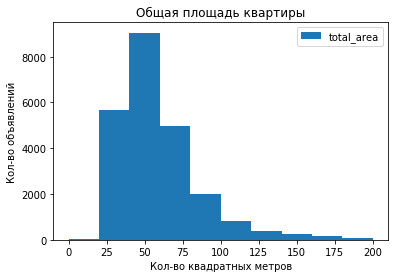

In [55]:
df.plot(y='total_area', title='Общая площадь квартиры', kind='hist', range=[0,200])
plt.xlabel("Кол-во квадратных метров")
plt.ylabel("Кол-во объявлений")

* Большая часть квартир находится в пределах от 20 до 100 кв. м., больше 200 кв.м. квартир почти нет - редкие выбивающиеся значения

Text(0, 0.5, 'Кол-во объявлений')

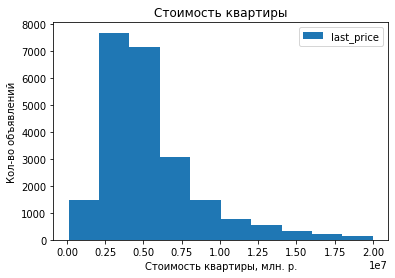

In [56]:
df.plot(y='last_price', title='Стоимость квартиры', kind='hist', range=[100000, 20000000])
plt.xlabel("Стоимость квартиры, млн. р.")
plt.ylabel("Кол-во объявлений")

* Стоимость большинства квартир находится в пределах от 1 до 10 млн р., дороже 20 млн. квартир почти нет - редкие выбивающиеся значения

Text(0, 0.5, 'Кол-во объявлений')

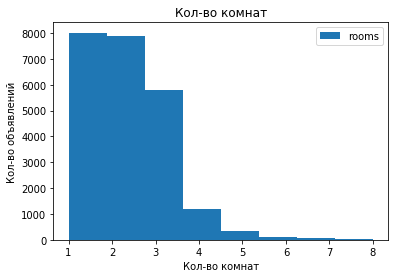

In [57]:
df.plot(y='rooms', title='Кол-во комнат', kind='hist', range=[1,8], bins=8)
plt.xlabel("Кол-во комнат")
plt.ylabel("Кол-во объявлений")

* Большинство квартир 1-3 комнатные, больше 5 комнат - это редкие выбивающиеся значения 

Text(0, 0.5, 'Кол-во объявлений')

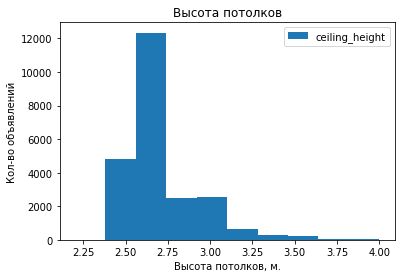

In [58]:
df.plot(y='ceiling_height', title='Высота потолков', kind='hist', range=[2.2,4])
plt.xlabel("Высота потолков, м.")
plt.ylabel("Кол-во объявлений")

* В большинстве квартир высота потолков находится в пределах от 2,2 до 3,1 м., потолки высотой более 4 м. - это редкие выбивающиеся значения 

In [59]:
df_petersburg = df.query('locality_name == "Санкт-Петербург"').copy()
# Создаём новый столбце с расстоянием до центра в километрах
df_petersburg['cityCenters_nearest_km']= df_petersburg['cityCenters_nearest'] / 1000
# Округляем расстоянием до центра до целого числа  
df_petersburg['cityCenters_nearest_km'] = df_petersburg['cityCenters_nearest_km'].astype('int')

Text(0, 0.5, 'Кол-во объявлений')

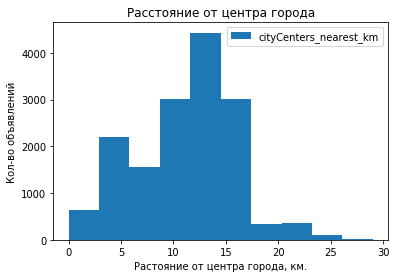

In [60]:
df_petersburg.plot(y='cityCenters_nearest_km', title='Расстояние от центра города', kind='hist')
plt.xlabel("Растояние от центра города, км.")
plt.ylabel("Кол-во объявлений")

* Большинство квартир в Санкт-Петербурге, находятся на расстояние от 1 до 17 км. от центра

#### Вывод

* Большая часть квартир находится в пределах от 20 до 100 кв. м., больше 200 кв.м. квартир почти нет - редкие выбивающиеся значения
* Стоимость большинства квартир находится в пределах от 1 до 10 млн р., дороже 20 млн. квартир почти нет - редкие выбивающиеся значения
* Большинство квартир 1-3 комнатные, больше 5 комнат - это редкие выбивающиеся значения 
* В большинстве квартир высота потолков находится в пределах от 2,2 до 3,2 м., потолки высотой более 4 м. - это редкие выбивающиеся значения
* Большинство квартир в Санкт-Петербурге, находятся на расстояние от 1 до 17 км. от центра

### Изучение времени продажи квартиры

Text(0, 0.5, 'Кол-во объявлений')

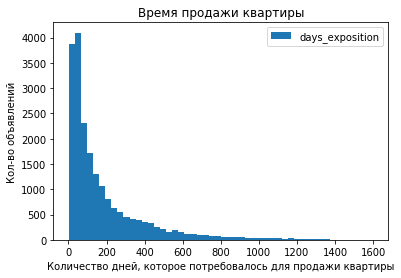

In [61]:
# Строим гистограмму по столбцу 'days_exposition'
df.plot(y='days_exposition', title='Время продажи квартиры', kind='hist', bins=50, range=(1,1600))
plt.xlabel("Количество дней, которое потребовалось для продажи квартиры")
plt.ylabel("Кол-во объявлений")

По графику видно, что время продажи квартиры, занимают в основном от 1 до 200 дней, отбросим значения выше 200 и построим новый график

Text(0, 0.5, 'Кол-во объявлений')

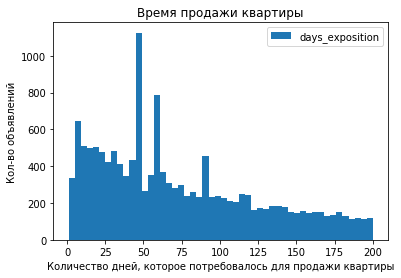

In [62]:
df.plot(y='days_exposition', title='Время продажи квартиры', kind='hist', bins=50, range=(1,200))
plt.xlabel("Количество дней, которое потребовалось для продажи квартиры")
plt.ylabel("Кол-во объявлений")

По данному графику видно, что есть сильно выбивающиеся значения: 45, 60 и 90 дней. Больше всего выбиваются продажи на 45 день. Построим график без этих значений

Text(0, 0.5, 'Кол-во объявлений')

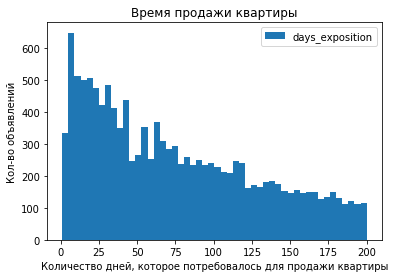

In [63]:
df.query(
    '0< days_exposition <= 200 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90'
).plot(y='days_exposition', title='Время продажи квартиры', kind='hist', bins=50)
plt.xlabel("Количество дней, которое потребовалось для продажи квартиры")
plt.ylabel("Кол-во объявлений")

Найдем характеристики с помощью функции describe

In [64]:
df.query('days_exposition > 0')['days_exposition'].describe()

count    20445.000000
mean       180.781316
std        219.825815
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее арифметическое значение очень сильно отличается от медианного, по-видимому редкие и выбивающиеся значения, сильно влияют на среднее арифметическое значение. Посмотрим на характеристики, без данных значений.

In [65]:
df.query(
    '0< days_exposition <= 200 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90'
)['days_exposition'].describe()

count    12992.000000
mean        74.883390
std         54.924317
min          1.000000
25%         27.000000
50%         64.000000
75%        116.000000
max        200.000000
Name: days_exposition, dtype: float64

Среднее арифметическое и медианное значение, стали гораздо ближе друг к другу. Стандартное отклонение уменьшилось в три раза. 

#### Вывод

* Обычно продажи занимают от 1 до 200 дней
* Продажи, которые прошли быстрее 30 дней можно считать очень быстрыми, таких продаж менее 25%
* Продажи, которые заняли более года можно считать необычно долгими

Text(0, 0.5, 'Кол-во объявлений')

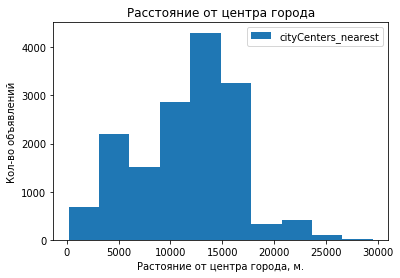

In [67]:
df_petersburg.plot(y='cityCenters_nearest', title='Расстояние от центра города', kind='hist')
plt.xlabel("Растояние от центра города, м.")
plt.ylabel("Кол-во объявлений")

### Зависимость цены от различных параметров

In [68]:
# список столбцов по которым необходимо провести корреляцию с ценой
list_corr = ['total_area', 'rooms', 'cityCenters_nearest']

In [69]:
# функция для корреляции по заданным параметрам
def func_corr (df_corr, list_corr, reference):
    # цикл для перебора всех значений из списка list_corr
    for i in list_corr:
        # находим коэфициент корреляции
        corr = df_corr[reference].corr(df_corr[i])
        # Вывод информации о зависимости, исходя из значения коэфициента корреляции
        if corr > 0.6:
            print(f'{i}: прямая, сильная зависимость, r = {corr:.2}')
        elif 0.4 < corr <= 0.6:
            print(f'{i}: прямая, средняя зависимость, r = {corr:.2}')
        elif 0.2 <= corr <= 0.4:
            print(f'{i}: прямая, слабая зависимость, r = {corr:.2}')
        elif -0.2 < corr < 0.2:
            print(f'{i}: зависимость не значительная, r = {corr:.2}')
        elif -0.4 <= corr <= -0.2:
            print(f'{i}: обратная, слабая зависимость, r = {corr:.2}')
        elif -0.6 <= corr < -0.4:
            print(f'{i}: обратная, средняя зависимость, r = {corr:.2}')
        else:
            print(f'{i}: обратная, сильная зависимость, r = {corr:.2}')

In [70]:
func_corr(df, list_corr, 'last_price') #вызов функции для подсчёта корреляции

total_area: прямая, сильная зависимость, r = 0.65
rooms: прямая, слабая зависимость, r = 0.36
cityCenters_nearest: обратная, слабая зависимость, r = -0.21


Создаём скорректированные выборки

In [71]:
df_price_corr_1 = df.query('(100000 < last_price < 20000000) and (20 < total_area < 120)')
df_price_corr_2 = df.query('(100000 < last_price < 20000000) and (1 <= rooms <= 4)')
df_petersburg_price_corr = df_petersburg.query('100000 < last_price < 20000000')

Найдём корреляцию для скорректированных выборк

In [72]:
func_corr(df_price_corr_1, ['total_area'], 'last_price')
func_corr(df_price_corr_2, ['rooms'], 'last_price')
func_corr(df_petersburg_price_corr, ['cityCenters_nearest_km'], 'last_price')

total_area: прямая, сильная зависимость, r = 0.73
rooms: прямая, средняя зависимость, r = 0.47
cityCenters_nearest_km: обратная, средняя зависимость, r = -0.41


Во всех случаях зависимость усилилась, значит редкие значения сильно влияли на результат.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0add5c3450>,
      dtype=object)

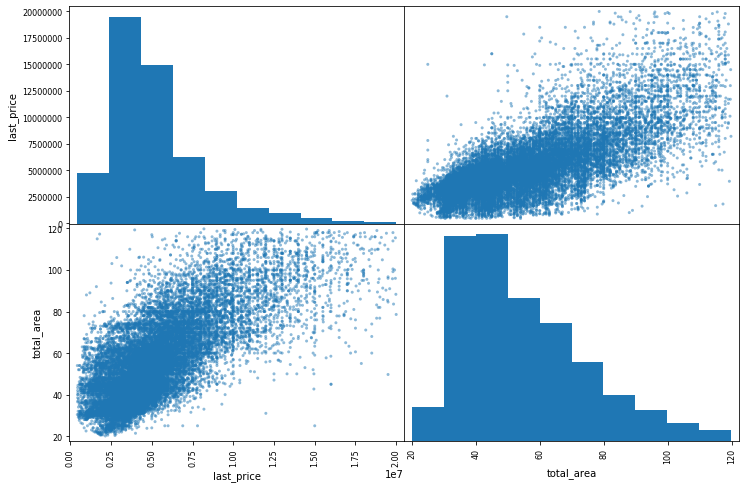

In [73]:
# Построим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(df_price_corr_1 [['last_price','total_area']] , figsize=(12, 8)) 

* График подтверждает сильную зависимость стоимости квартиры от общей площади квартиры.
* На графики так же можно заметить редкие выбивающиеся значения, когда квартиры с маленькой площадью стоят дорого и наоборот - квартиры большой площади, стоят дешево

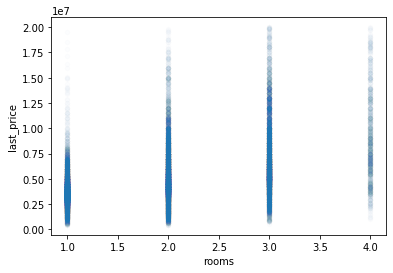

In [74]:
df_price_corr_2.plot(x='rooms', y='last_price', kind='scatter', alpha=0.01) 

* Наблюдаем зависимость, но не сильно выраженную

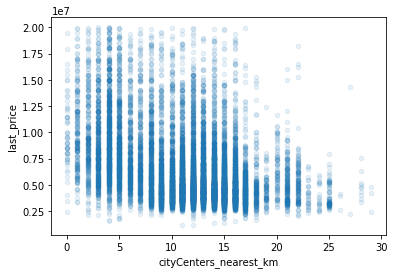

In [75]:
df_petersburg_price_corr.plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', alpha=0.1) 

* Наблюдаем зависимость, но не сильно выраженную

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [76]:
# Построим сводную таблицу, за индекс возьмём - на каком этаже расположена квартира: первом, последнем или другом.
# Значениями будет средние арифметическое стоимости квартир
df_price_corr_1.pivot_table(index='floor_categories', values='last_price', aggfunc='mean').sort_values(by='last_price')

,last_price
floor_categories,
Первый этаж,4.245973e+06
Последний этаж,4.822458e+06
Другой,5.434726e+06


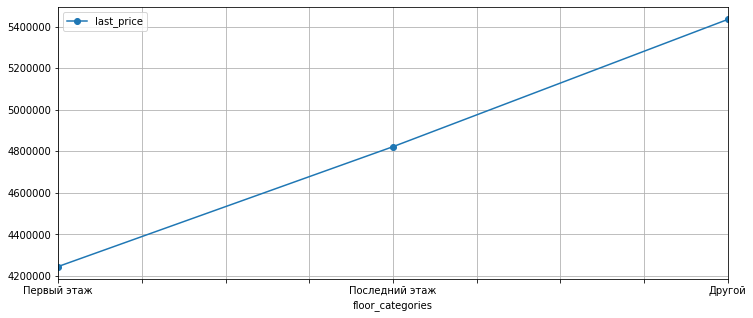

In [77]:
# Строим график для сводной таблицы
df_price_corr_1.pivot_table(
    index='floor_categories', values='last_price', aggfunc='mean'
).sort_values(by='last_price').plot(grid=True, style='o-', figsize=(12, 5))

In [78]:
# Построим сводную таблицу, за индекс возьмём - на каком этаже расположена квартира: первом, последнем или другом.
# Значениями будет медианная стоимость квартир
df_price_corr_1.pivot_table(index='floor_categories', values='last_price', aggfunc='median')

,last_price
floor_categories,
Другой,4690000.0
Первый этаж,3850000.0
Последний этаж,4100767.0


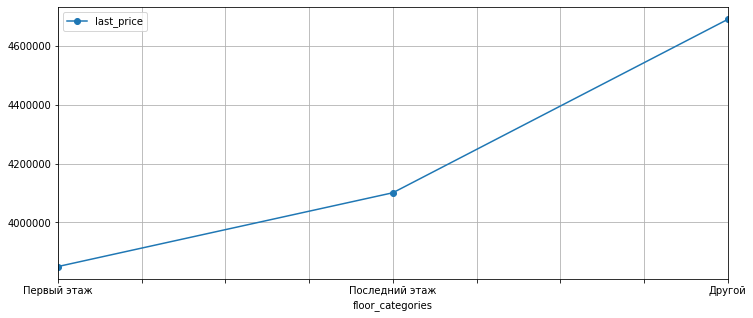

In [79]:
# Строим график для сводной таблицы
df_price_corr_1.pivot_table(
    index='floor_categories', values='last_price', aggfunc='median'
).sort_values(by='last_price').plot(grid=True, style='o-', figsize=(12, 5))

Исходя из сводных таблиц и графиков, можно сделать слудующие выводы:
* квартиры на первом и последнем этаже стоят дешевле чем квартиры на других этажах 
* квартиры на первом этаже стоят дешевле всего

Изучим зависимость цены от даты размещения: дня недели, месяца и года.

In [80]:
# вызов функции для подсчёта корреляции
func_corr(df_price_corr_1 , ['year_exposition', 'month_exposition', 'weekday_exposition'], 'last_price')

year_exposition: зависимость не значительная, r = -0.013
month_exposition: зависимость не значительная, r = 0.0055
weekday_exposition: зависимость не значительная, r = -0.013


Text(0, 0.5, 'Кол-во объявлений')

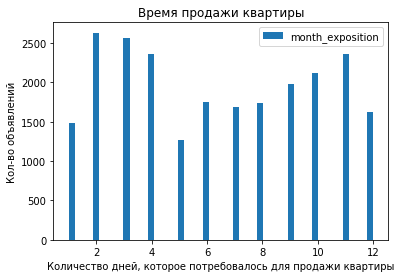

In [81]:
df.plot(y='month_exposition', title='Время продажи квартиры', kind='hist', bins=50)
plt.xlabel("Количество дней, которое потребовалось для продажи квартиры")
plt.ylabel("Кол-во объявлений")

Text(0, 0.5, 'Кол-во объявлений')

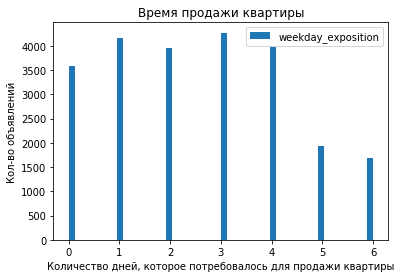

In [82]:
df.plot(y='weekday_exposition', title='Время продажи квартиры', kind='hist', bins=50)
plt.xlabel("Количество дней, которое потребовалось для продажи квартиры")
plt.ylabel("Кол-во объявлений")

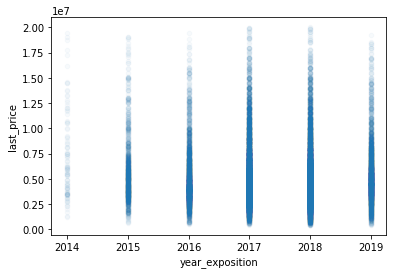

In [83]:
df_price_corr_1.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.03) 

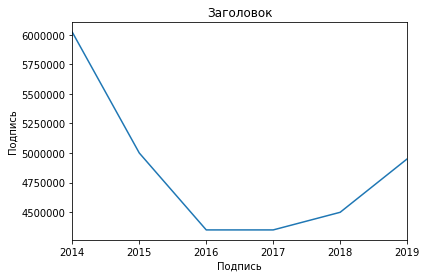

In [123]:
# КОД РЕВЬЮЕРА


df_price_corr_1.groupby('year_exposition')['last_price'].median().plot()


plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')
plt.show()

* Зависимость цены от года публикации объявления, не прослеживается

Text(0, 0.5, 'Кол-во объявлений')

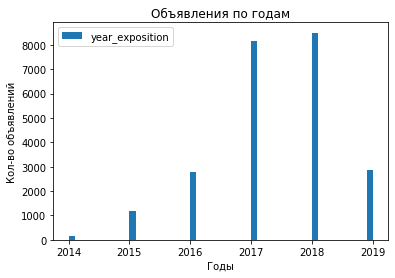

In [84]:
df.plot(y='year_exposition', title='Объявления по годам', kind='hist', bins=50)
plt.xlabel("Годы")
plt.ylabel("Кол-во объявлений")

* Кол-во объявлений сильно выросло в 2017 и 2018 год.

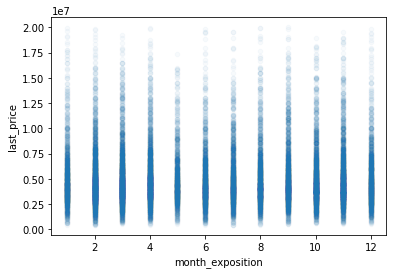

In [85]:
df_price_corr_1.plot(x='month_exposition', y='last_price', kind='scatter', alpha=0.03) 

* Зависимость цены от месяца публикации объявления, не прослеживается

Text(0, 0.5, 'Кол-во объявлений')

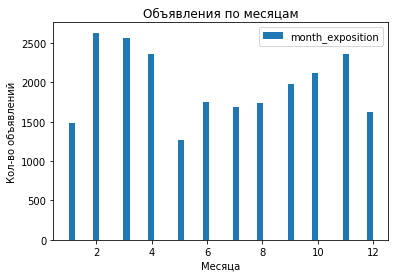

In [86]:
df.plot(y='month_exposition', title='Объявления по месяцам', kind='hist', bins=50)
plt.xlabel("Месяца")
plt.ylabel("Кол-во объявлений")

* В мае меньше всего публикаций объявлений, а в феврале и марте, больше всего

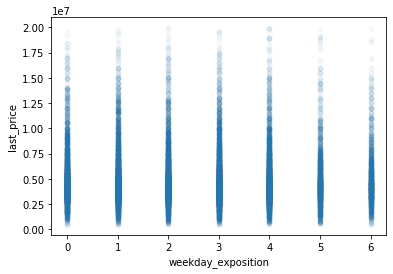

In [87]:
df_price_corr_1.plot(x='weekday_exposition', y='last_price', kind='scatter', alpha=0.03) 

* Зависимость цены от дня недели публикации объявления, не прослеживается

Text(0, 0.5, 'Кол-во объявлений')

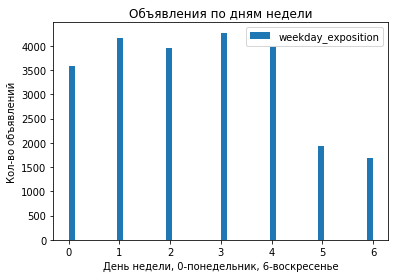

In [88]:
df.plot(y='weekday_exposition', title='Объявления по дням недели', kind='hist', bins=50)
plt.xlabel("День недели, 0-понедельник, 6-воскресенье")
plt.ylabel("Кол-во объявлений")

* В выходные дни, публикуется в два раза меньше объявлений, чем в будни

#### Вывод

* Цена квартиры сильно зависит от общей площади квартиры (r = 0.73)
* Цена квартиры умеренно зависит от количества комнат в квартире (r = 0.77)
* Цена квартиры умеренно зависит от удаленности квартиры от центра города (r = -0.41)
* Квартиры на первом и последнем этаже стоят дешевле чем квартиры на других этажах, квартиры на первом этаже стоят дешевле всего
* Цена квартиры не зависит линейно от дня недели, месяца или года размещения объявления (|r| < 0,03)
* Кол-во объявлений сильно выросло в 2017 и 2018 год
* В мае меньше всего публикаций объявлений, а в феврале и марте, больше всего
* В выходные дни, публикуется в два раза меньше объявлений, чем в будни

### Анализ по населённым пунктам

Выведем на экран 10 населённых пунктов с наибольшим числом объявлений и  посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [89]:
# Создаём сводную таблицу
df_locality_top10 = df.groupby('locality_name').agg({'locality_name':'count', 'last_price':'sum', 'total_area':'sum'})
df_locality_top10.columns = ['count', 'last_price','total_area']
df_locality_top10 = df_locality_top10.sort_values(by='count', ascending=False).head(10)

In [90]:
# Подсчёт средней цены за квадратный метр
df_locality_top10['price_sq_m'] = df_locality_top10['last_price'] / df_locality_top10['total_area']
df_locality_top10['price_sq_m'] = df_locality_top10['price_sq_m'].astype('int')
df_locality_top10['price_sq_m'].sort_values(ascending=False)

locality_name
Санкт-Петербург      124234
Пушкин               105097
деревня Кудрово       90916
посёлок Парголово     87110
посёлок Мурино        83203
посёлок Шушары        76328
Колпино               74467
Гатчина               68475
Всеволожск            67635
Выборг                57898
Name: price_sq_m, dtype: int64

#### Вывод
* Населенный пункты с самой высокой стоимостью жилья за квадратный метр: Санкт-Петербург (124 тыс. р.), Пушкин (105 тыс. р.), деревня Кудрово (90 тыс. р.)
* Населенный пункты с самой низкой стоимостью жилья за квадратный метр: Выборг (57 тыс. р.), Всеволожск (67 тыс. р.), Гатчина (68 тыс. р.)

### Определение границ центра города

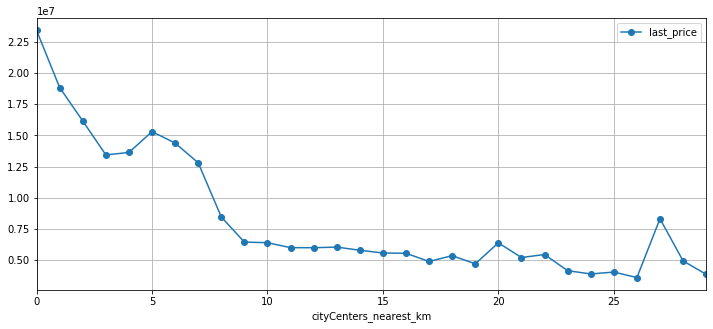

In [91]:
# Строим график, который показывает зависимость цены от удаленности от центра
df_petersburg.groupby('cityCenters_nearest_km').agg({'last_price':'mean'}).plot(grid=True, style='o-', figsize=(12, 5))

#### Вывод

* Границей центральной зоны можно считать расстояние от 0 до 3 км., далее цена резко падает

### Анализ квартир во всём городе и в центре 

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [92]:
# Создаём новый датафрэйм, в который помещаем квартиры находящиеся в центре города
df_petersburg_center = df_petersburg.query('0 <= cityCenters_nearest_km <= 3')

#### Изучение параметров

##### Во всём городе

Text(0, 0.5, 'Кол-во объявлений')

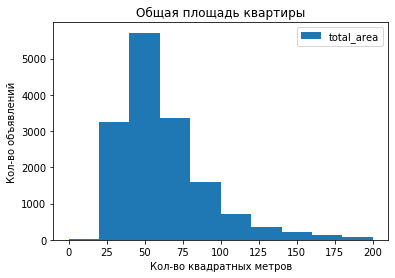

In [93]:
df_petersburg.plot(y='total_area', title='Общая площадь квартиры', kind='hist', range=[0,200])
plt.xlabel("Кол-во квадратных метров")
plt.ylabel("Кол-во объявлений")

* Большая часть квартир находится в пределах от 20 до 100 кв. м., больше 200 кв.м. квартир почти нет - редкие выбивающиеся значения.

Text(0, 0.5, 'Кол-во объявлений')

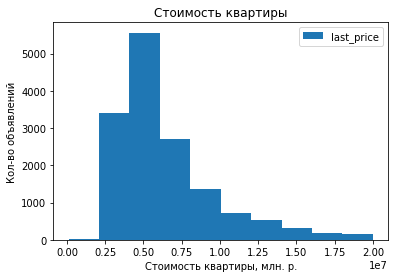

In [94]:
df_petersburg.plot(y='last_price', title='Стоимость квартиры', kind='hist', range=[100000, 20000000])
plt.xlabel("Стоимость квартиры, млн. р.")
plt.ylabel("Кол-во объявлений")

* Стоимость большинства квартир находится в пределах от 2 до 10 млн р., дороже 20 млн. квартир почти нет - редкие выбивающиеся значения.

Text(0, 0.5, 'Кол-во объявлений')

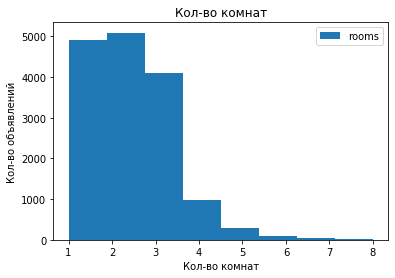

In [95]:
df_petersburg.plot(y='rooms', title='Кол-во комнат', kind='hist', range=[1,8], bins=8)
plt.xlabel("Кол-во комнат")
plt.ylabel("Кол-во объявлений")

* Большинство квартир 1-3 комнатные, больше 5 комнат - это редкие выбивающиеся значения.

Text(0, 0.5, 'Кол-во объявлений')

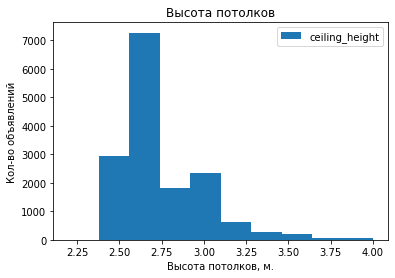

In [96]:
df_petersburg.plot(y='ceiling_height', title='Высота потолков', kind='hist', range=[2.2,4])
plt.xlabel("Высота потолков, м.")
plt.ylabel("Кол-во объявлений")

* В большинстве квартир высота потолков находится в пределах от 2,2 до 3,2 м., потолки высотой более 4 м. - это редкие выбивающиеся значения. 

Найдем характеристики с помощью функции describe

In [97]:
df_petersburg[['total_area', 'last_price', 'rooms']].describe()

,total_area,last_price,rooms
count,15660.000000,1.566000e+04,15660.000000
mean,64.658142,8.032783e+06,2.171073
std,40.222451,1.296998e+07,1.146765
min,12.000000,1.219000e+04,0.000000
25%,42.000000,4.200000e+06,1.000000
50%,55.000000,5.500000e+06,2.000000
75%,74.500000,8.130000e+06,3.000000
max,900.000000,7.630000e+08,19.000000


In [98]:
df_petersburg.query('ceiling_height !=0')['ceiling_height'].describe()

count    15660.000000
mean         2.751004
std          0.829435
min          1.000000
25%          2.600000
50%          2.650000
75%          2.810000
max        100.000000
Name: ceiling_height, dtype: float64

###### Вывод

* Большая часть квартир находится в пределах от 20 до 100 кв. м., больше 200 кв.м. квартир почти нет - редкие выбивающиеся значения. Средние значение - 64 кв. м., медианное значение - 55 кв. м.
* Стоимость большинства квартир находится в пределах от 2 до 10 млн р., дороже 20 млн. квартир почти нет - редкие выбивающиеся значения. Средние значение - 8 млн. р., медианное значение - 5,5 млн. р.
* Большинство квартир 1-3 комнатные, больше 5 комнат - это редкие выбивающиеся значения. Средние значение - 2,17 комнат, медианное значение - 2 комнаты. 
* В большинстве квартир высота потолков находится в пределах от 2,2 до 3,2 м., потолки высотой более 4 м. - это редкие выбивающиеся значения. Средние значение - 2,77 метров, медианное значение - 2,7 метра. 

##### В центре

Text(0, 0.5, 'Кол-во объявлений')

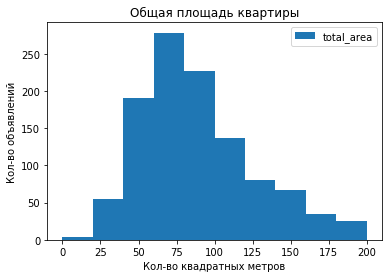

In [99]:
df_petersburg_center.plot(y='total_area', title='Общая площадь квартиры', kind='hist', range=[0,200])
plt.xlabel("Кол-во квадратных метров")
plt.ylabel("Кол-во объявлений")

* Большая часть квартир находится в пределах от 20 до 120 кв. м., больше 200 кв.м. квартир почти нет - редкие выбивающиеся значения.

Text(0, 0.5, 'Кол-во объявлений')

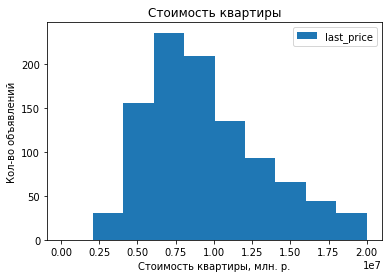

In [100]:
df_petersburg_center.plot(y='last_price', title='Стоимость квартиры', kind='hist', range=[100000, 20000000])
plt.xlabel("Стоимость квартиры, млн. р.")
plt.ylabel("Кол-во объявлений")

* Стоимость большинства квартир находится в пределах от 3 до 13 млн р., дороже 20 млн. квартир почти нет - редкие выбивающиеся значения.

Text(0, 0.5, 'Кол-во объявлений')

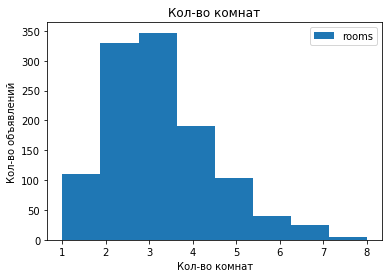

In [101]:
df_petersburg_center.plot(y='rooms', title='Кол-во комнат', kind='hist', range=[1,8], bins=8)
plt.xlabel("Кол-во комнат")
plt.ylabel("Кол-во объявлений")

* Большинство квартир 1-4 комнатные, больше 5 комнат - это редкие выбивающиеся значения.

Text(0, 0.5, 'Кол-во объявлений')

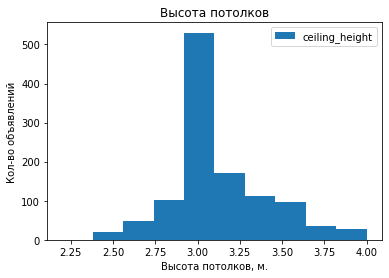

In [102]:
df_petersburg_center.plot(y='ceiling_height', title='Высота потолков', kind='hist', range=[2.2,4])
plt.xlabel("Высота потолков, м.")
plt.ylabel("Кол-во объявлений")

* В большинстве квартир высота потолков находится в пределах от 2,5 до 3,5 м., потолки высотой более 4 м. - это редкие выбивающиеся значения.

Найдем характеристики с помощью функции describe

In [103]:
df_petersburg_center[['total_area', 'last_price', 'rooms']].describe()

,total_area,last_price,rooms
count,1159.000000,1.159000e+03,1159.000000
mean,97.399172,1.602257e+07,3.104400
std,55.772422,3.292117e+07,1.558964
min,12.000000,2.100000e+06,0.000000
25%,62.000000,7.000000e+06,2.000000
50%,84.100000,9.500000e+06,3.000000
75%,115.250000,1.447000e+07,4.000000
max,517.000000,7.630000e+08,19.000000


In [104]:
df_petersburg_center.query('ceiling_height !=0')['ceiling_height'].describe()

count    1159.000000
mean        3.134806
std         0.324656
min         2.450000
25%         3.000000
50%         3.000000
75%         3.280000
max         5.800000
Name: ceiling_height, dtype: float64

###### Вывод

* Большая часть квартир находится в пределах от 20 до 120 кв. м., больше 200 кв.м. квартир почти нет - редкие выбивающиеся значения. Средние значение - 97 кв. м., медианное значение - 84 кв. м.
* Стоимость большинства квартир находится в пределах от 2 до 13 млн р., дороже 20 млн. квартир почти нет - редкие выбивающиеся значения. Средние значение - 16 млн. р., медианное значение - 9,5 млн. р.
* Большинство квартир 1-4 комнатные, больше 5 комнат - это редкие выбивающиеся значения. Средние значение - 3,1 комнат, медианное значение - 3 комнаты.
* В большинстве квартир высота потолков находится в пределах от 2,2 до 3,5 м., потолки высотой более 4 м. - это редкие выбивающиеся значения. Средние значение - 3,13 м., медианное значение - 3 м.

##### Вывод

* В центре общая площадь квартиры больше, чем в среднем по городу. Медианное значение - 84 кв.м., против 55 кв м.
* В центре стоимость квартир выше, чем в среднем по городу. Медианное значение - 9,5 млн. р., против 5,5 млн. р.
* В центре количество комнат в квартире больше, чем в среднем по городу. Среднее значение - 3,1 комнат, против 2,17 комнат.
* В центре высота потолков в квартирах больше, чем в среднем по городу. Среднее значение - 3,13 м., против 2,77 м.


#### Факторы влияющие на стоимость квартиры

In [105]:
# список столбцов по которым необходимо провести корреляцию с ценой
list_corr_full =(
    ['year_exposition', 'month_exposition', 'weekday_exposition',
     'airports_nearest', 'balcony', 'ceiling_height', 'days_exposition', 'floor', 'floors_total', 'kitchen_area',
     'living_area', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'total_images']
)

##### Во всём городе

Создадим скорректированные выборки

In [106]:
df_petersburg_corr_1 = df_petersburg.query('(100000 < last_price < 20000000) and (20 < total_area < 120)')
df_petersburg_corr_2 = df_petersburg.query('(100000 < last_price < 20000000) and (1 <= rooms <= 4)')

Найдём коэфициенты корреляции

In [107]:
func_corr(df_petersburg_corr_1, ['total_area'], 'last_price')
func_corr(df_petersburg_corr_2, ['rooms'], 'last_price')
func_corr(df_petersburg_price_corr, ['cityCenters_nearest_km'], 'last_price')

total_area: прямая, сильная зависимость, r = 0.8
rooms: прямая, средняя зависимость, r = 0.51
cityCenters_nearest_km: обратная, средняя зависимость, r = -0.41


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0aceaa6350>,
      dtype=object)

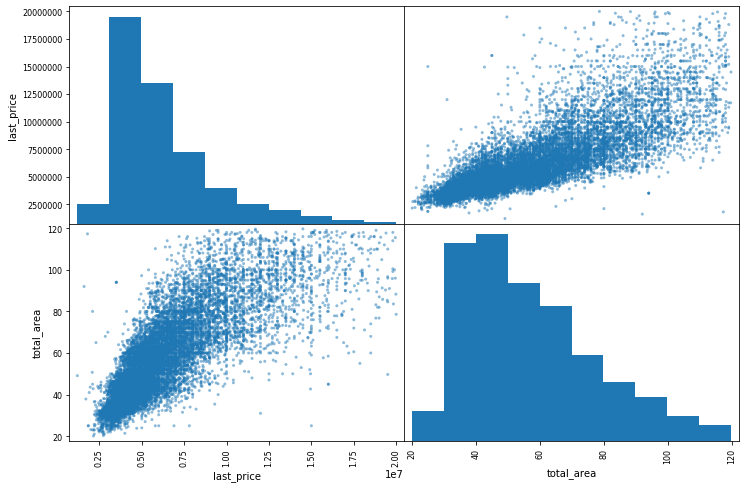

In [108]:
pd.plotting.scatter_matrix(df_petersburg_corr_1[['last_price','total_area']] , figsize=(12, 8))

* График подтверждает сильную зависимость стоимости квартиры от общей площади квартиры.
* На графики так же можно заметить редкие выбивающиеся значения, когда квартиры с маленькой площадью стоят дорого и наоборот - квартиры большой площади, стоят дешево

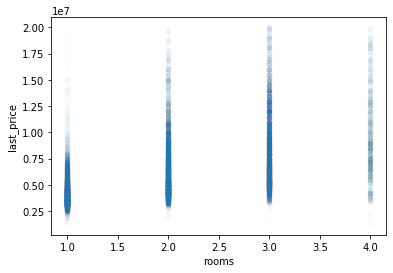

In [109]:
df_petersburg_corr_2.plot(x='rooms', y='last_price', kind='scatter', alpha=0.01) 

* Наблюдаем зависимость, но не сильно выраженную

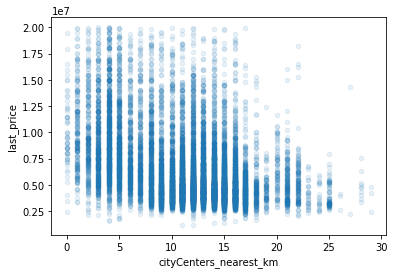

In [110]:
df_petersburg_price_corr.plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', alpha=0.1)

* Наблюдаем обратную зависимость, но не сильно выраженную

Проверим зависимость цены от дополнительных параметров

In [111]:
# вызов функции для подсчёта корреляции
func_corr(df_petersburg_price_corr, list_corr_full, 'last_price')

year_exposition: зависимость не значительная, r = -0.021
month_exposition: зависимость не значительная, r = -0.0042
weekday_exposition: зависимость не значительная, r = -0.01
airports_nearest: зависимость не значительная, r = -0.0082
balcony: зависимость не значительная, r = 0.046
ceiling_height: зависимость не значительная, r = 0.16
days_exposition: зависимость не значительная, r = 0.091
floor: зависимость не значительная, r = 0.024
floors_total: зависимость не значительная, r = 0.00076
kitchen_area: прямая, средняя зависимость, r = 0.51
living_area: прямая, средняя зависимость, r = 0.6
parks_around3000: зависимость не значительная, r = 0.17
parks_nearest: зависимость не значительная, r = 0.053
ponds_around3000: зависимость не значительная, r = 0.2
ponds_nearest: зависимость не значительная, r = -0.11
total_images: зависимость не значительная, r = 0.13


Построим графики

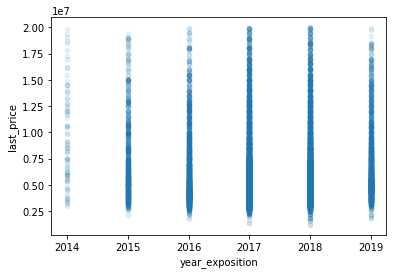

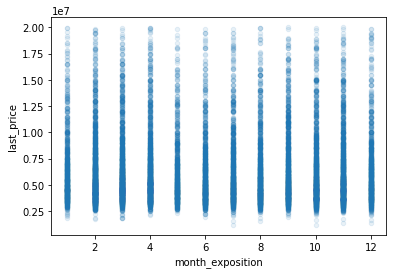

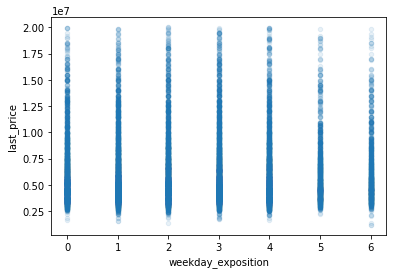

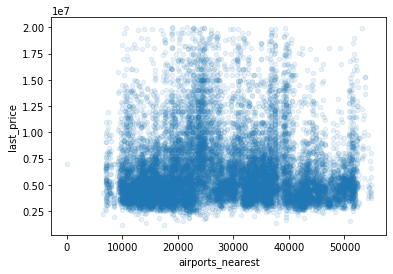

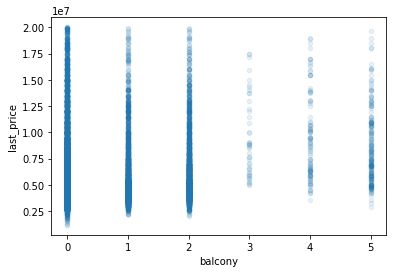

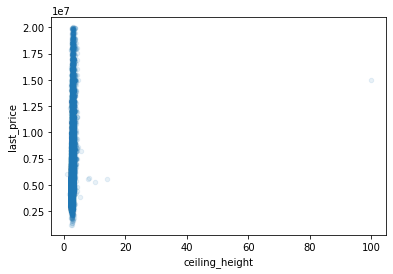

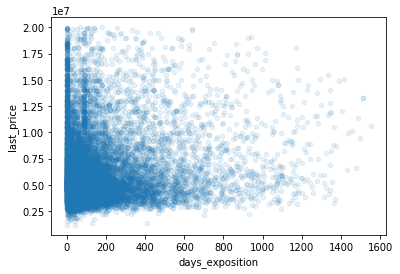

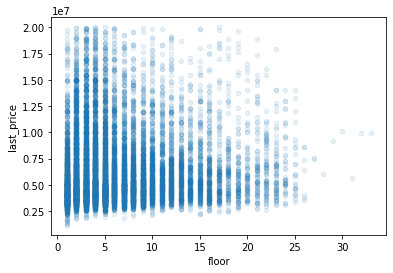

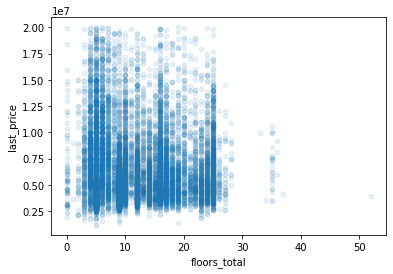

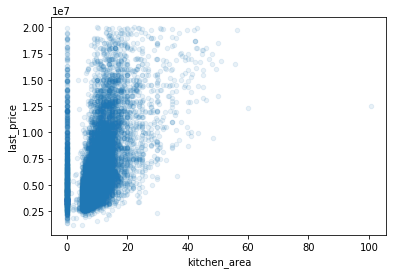

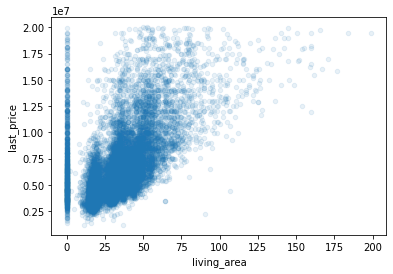

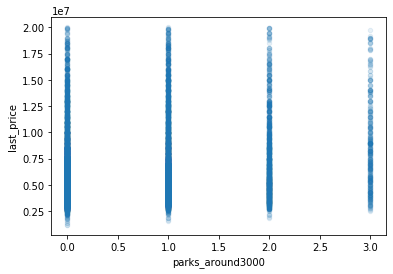

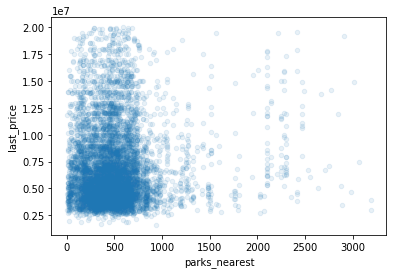

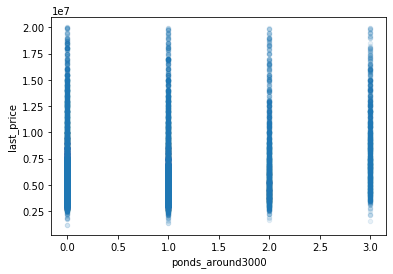

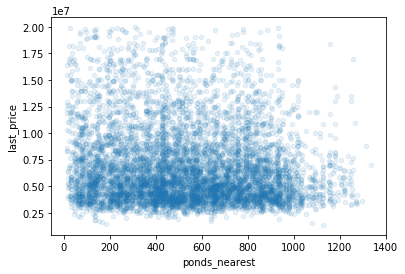

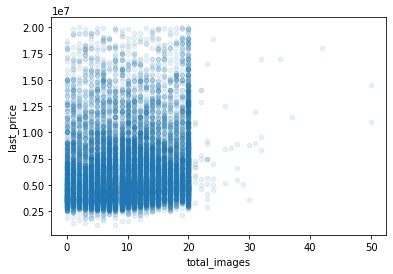

In [112]:
for i in list_corr_full:
    df_petersburg_price_corr.plot(x=i, y='last_price', kind='scatter', alpha=0.1)

##### В центре

Создадим скорректированные выборки

In [113]:
df_petersburg_center_corr_1 = df_petersburg_center.query('(100000 < last_price < 20000000) and (20 < total_area < 120)')
df_petersburg_center_corr_2 = df_petersburg_center.query('(100000 < last_price < 20000000) and (1 <= rooms <= 4)')
df_petersburg_center_price_corr = df_petersburg_center.query('100000 < last_price < 20000000')

Найдём коэфициенты корреляции

In [114]:
func_corr(df_petersburg_center_corr_1, ['total_area'], 'last_price')
func_corr(df_petersburg_center_corr_2, ['rooms'], 'last_price')
func_corr(df_petersburg_center_price_corr, ['cityCenters_nearest_km'], 'last_price')

total_area: прямая, сильная зависимость, r = 0.63
rooms: прямая, средняя зависимость, r = 0.42
cityCenters_nearest_km: зависимость не значительная, r = -0.11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ace0c4110>,
      dtype=object)

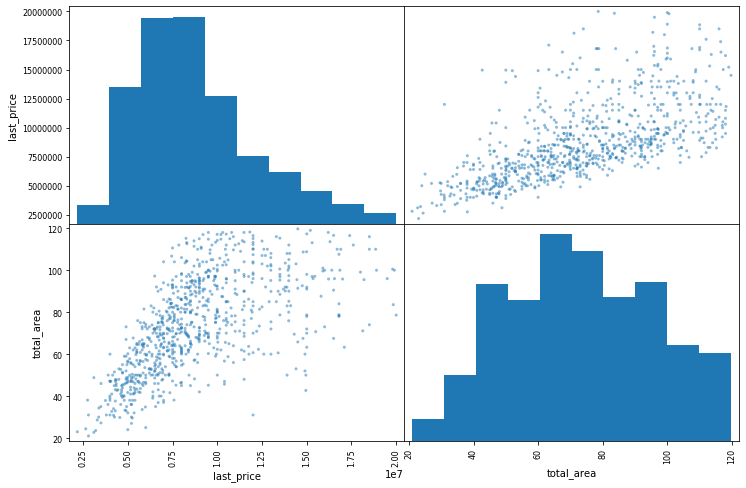

In [115]:
pd.plotting.scatter_matrix(df_petersburg_center_corr_1 [['last_price','total_area']] , figsize=(12, 8))

* График подтверждает сильную зависимость стоимости квартиры от общей площади квартиры.
* На графики так же можно заметить редкие выбивающиеся значения, когда квартиры с маленькой площадью стоят дорого и наоборот - квартиры большой площади, стоят дешево

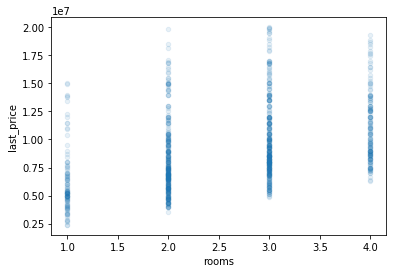

In [116]:
df_petersburg_center_corr_2.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1) 

* Наблюдаем зависимость, но не сильно выраженную

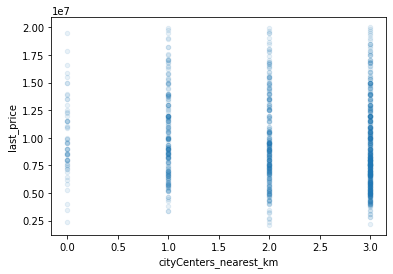

In [117]:
df_petersburg_center_price_corr.plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', alpha=0.1)

Зависимость практически не наблюдается

Проверим зависимость цены от дополнительных параметров

In [118]:
# вызов функции для подсчёта корреляции
func_corr(df_petersburg_center_price_corr, list_corr_full, 'last_price')

year_exposition: зависимость не значительная, r = 0.017
month_exposition: зависимость не значительная, r = -0.092
weekday_exposition: зависимость не значительная, r = -0.025
airports_nearest: зависимость не значительная, r = 0.063
balcony: зависимость не значительная, r = 0.086
ceiling_height: зависимость не значительная, r = 0.19
days_exposition: зависимость не значительная, r = 0.011
floor: зависимость не значительная, r = 0.18
floors_total: зависимость не значительная, r = 0.071
kitchen_area: прямая, слабая зависимость, r = 0.38
living_area: прямая, средняя зависимость, r = 0.58
parks_around3000: зависимость не значительная, r = 0.041
parks_nearest: зависимость не значительная, r = 0.05
ponds_around3000: зависимость не значительная, r = -0.012
ponds_nearest: зависимость не значительная, r = 0.011
total_images: зависимость не значительная, r = 0.15


Построим графики

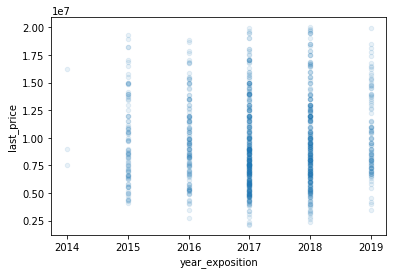

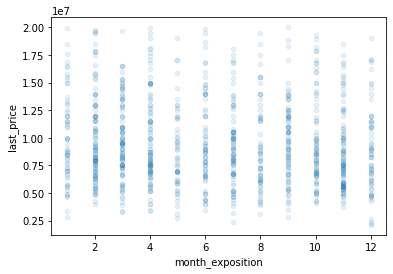

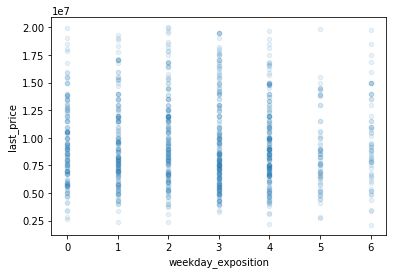

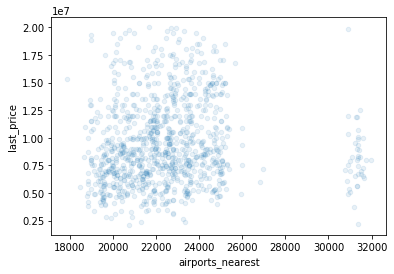

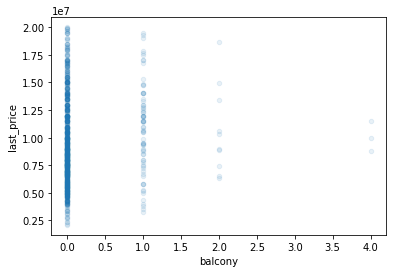

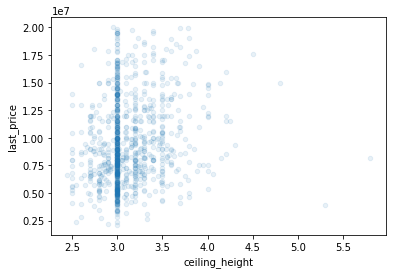

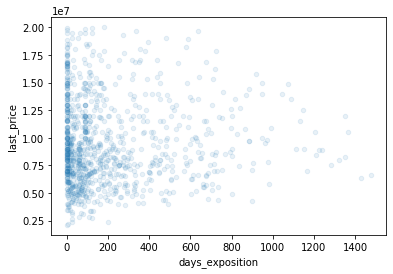

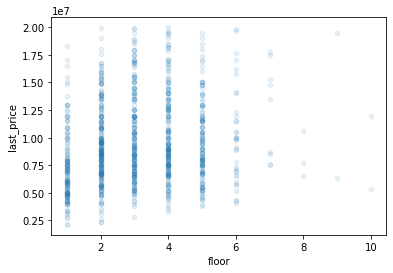

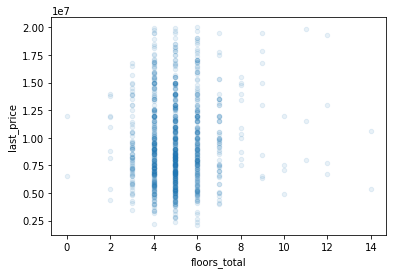

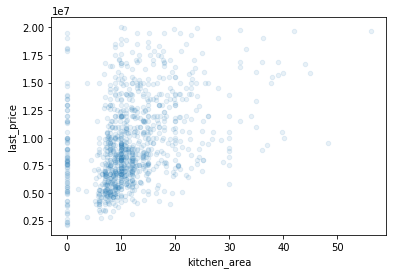

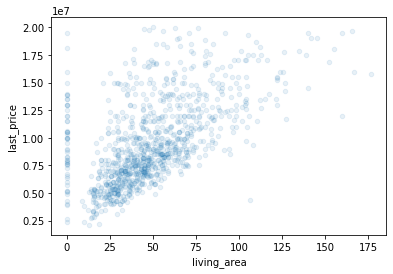

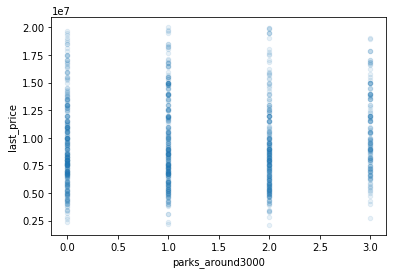

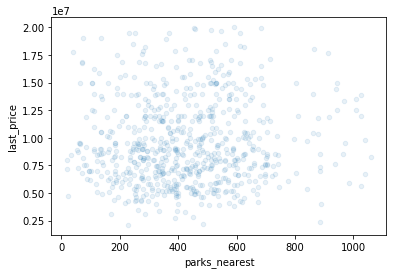

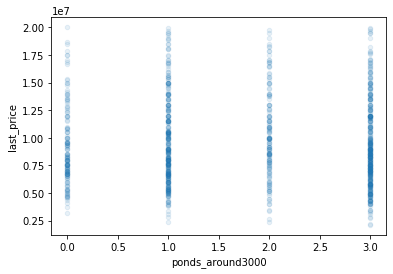

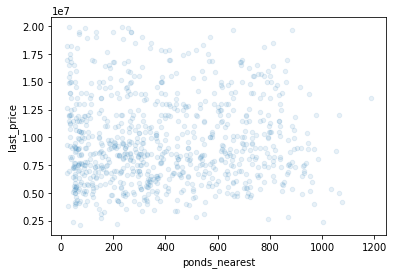

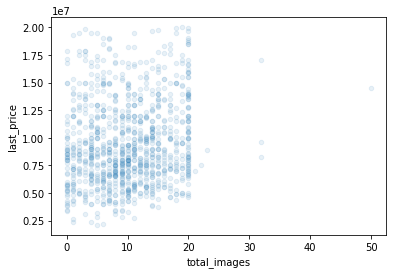

In [119]:
for i in list_corr_full:
    df_petersburg_center_price_corr.plot(x=i, y='last_price', kind='scatter', alpha=0.1)

##### Вывод

* Цена квартиры сильно зависит от общей площади квартиры, как в центре города (r = 0.63), так и в городе в целом (r = 0.8), но в целом городе, зависимость выражена сильнее, чем в центре города. 
* Цена квартиры умеренно зависит от количества комнат в квартире, как в центре города (r = 0.42), так и в городе в целом (r = 0.51), но в целом городе, зависимость выражена немного сильнее, чем в центре города. 
* Цена квартиры имеет незначительную обратную зависимость (r = -0.11) от удаленности квартиры от центра города, в случае расположения квартиры в границе центра города. В целом по городу, цена квартиры имеет обратную среднею зависимость (r = -0.41) от удаленности квартиры от центра города.
* Цена квартиры умеренно зависит от площади кухни, как в центре города (r = 0.38), так и в городе в целом (r = 0.51), но в целом городе, зависимость выражена сильнее, чем в центре города.
* Цена квартиры умеренно зависит от общей жилой площади в квартире, как в центре города (r = 0.58), так и в городе в целом (r = 0.6).
* В целом по городу, цена квартиры имеет маленькую завимость (r = 0.2) от количества водоёмов в радиусе 3 км., а в центре города, зависимоть отсутствует совсем (r = -0.012).

## Общий вывод

###### Параметры квартир по всей выборке:

* Большая часть квартир находится в пределах от 20 до 100 кв. м., больше 200 кв.м. квартир почти нет - редкие выбивающиеся значения
* Стоимость большинства квартир находится в пределах от 1 до 10 млн р., дороже 20 млн. квартир почти нет - редкие выбивающиеся значения
* Большинство квартир 1-3 комнатные, больше 5 комнат - это редкие выбивающиеся значения 
* В большинстве квартир высота потолков находится в пределах от 2,2 до 3,2 м., потолки высотой более 4 м. - это редкие выбивающиеся значения

######  Сроки продажи квартир:

* Обычно продажи занимают от 1 до 200 дней
* Продажи, которые прошли быстрее 30 дней можно считать очень быстрыми, таких продаж менее 25%
* Продажи, которые заняли более года можно считать необычно долгими

###### Зависимость цены квартиры от различных параметров, по всей выборке:

* Цена квартиры сильно зависит от общей площади квартиры (r = 0.73)
* Цена квартиры умеренно зависит от количества комнат в квартире (r = 0.77)
* Цена квартиры умеренно зависит от удаленности квартиры от центра города (r = -0.41)
* Квартиры на первом и последнем этаже стоят дешевле чем квартиры на других этажах, квартиры на первом этаже стоят дешевле всего
* Цена квартиры не зависит линейно от дня недели, месяца или года размещения объявления (|r| < 0,03)
* Кол-во объявлений сильно выросло в 2017 и 2018 год
* В мае меньше всего публикаций объявлений, а в феврале и марте, больше всего
* В выходные дни, публикуется в два раза меньше объявлений, чем в будни

###### Границей центральной зоны можно считать расстояние от 0 до 3 км.

###### Сравнительный анализ параметров квартир по центру города и городу в целом:

* В центре общая площадь квартиры больше, чем в среднем по городу. Медианное значение - 84 кв.м., против 55 кв м.
* В центре стоимость квартир выше, чем в среднем по городу. Медианное значение - 9,5 млн. р., против 5,5 млн. р.
* В центре количество комнат в квартире больше, чем в среднем по городу. Среднее значение - 3,1 комнат, против 2,17 комнат.
* В центре высота потолков в квартирах больше, чем в среднем по городу. Среднее значение - 3,13 м., против 2,77 м.

###### Сравнительный анализ  зависимости цены квартиры от различных параметров, по центру города и городу в целом:

* Цена квартиры сильно зависит от общей площади квартиры, как в центре города (r = 0.63), так и в городе в целом (r = 0.8), но в целом городе, зависимость выражена сильнее, чем в центре города. 
* Цена квартиры умеренно зависит от количества комнат в квартире, как в центре города (r = 0.42), так и в городе в целом (r = 0.51), но в целом городе, зависимость выражена немного сильнее, чем в центре города. 
* Цена квартиры имеет незначительную обратную зависимость (r = -0.11) от удаленности квартиры от центра города, в случае расположения квартиры в границе центра города. В целом по городу, цена квартиры имеет обратную среднею зависимость (r = -0.41) от удаленности квартиры от центра города.
* Цена квартиры умеренно зависит от площади кухни, как в центре города (r = 0.38), так и в городе в целом (r = 0.51), но в целом городе, зависимость выражена сильнее, чем в центре города.
* Цена квартиры умеренно зависит от общей жилой площади в квартире, как в центре города (r = 0.58), так и в городе в целом (r = 0.6).
* В целом по городу, цена квартиры имеет маленькую завимость (r = 0.2) от количества водоёмов в радиусе 3 км., а в центре города, зависимоть отсутствует совсем (r = -0.012).